In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras

import utils.reader as reader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
x_train, y_train = reader.load_mnist('data/fashion', kind='train')
x_test, y_test = reader.load_mnist('data/fashion', kind='t10k')

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


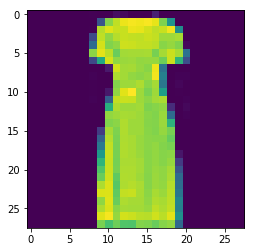

In [4]:
image = x_train[50, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [5]:
x_train = x_train.reshape(x_train.shape[0], *(28,28,1))
x_test = x_test.reshape(x_test.shape[0], *(28,28,1))

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


In [6]:
cnn_model = Sequential([
    Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(28,28,1)),
          MaxPooling2D(pool_size=2),
          Dropout(0.2),
          Flatten(),
          Dense(32, activation='relu'),
          Dense(10, activation='softmax')
           ])


In [ ]:
cnn_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.001),
    metrics=['accuracy'])

In [ ]:
model_history = cnn_model.fit(
    x_train, y_train, 
    epochs=30, verbose=1, 
    batch_size=512,
    validation_data=(x_test,y_test),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30


In [1]:
print(model_history)

NameError: name 'model_history' is not defined

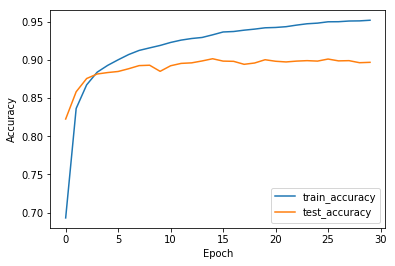

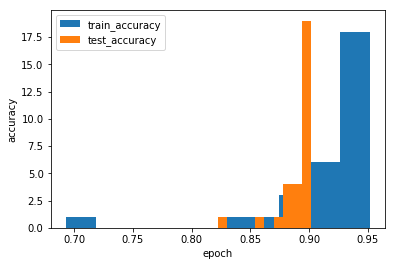

Test Loss: 0.3655
Test Accuracy: 0.8969


In [11]:
def display_graph(model_history):
    plt.plot(model_history.history['acc'])
    plt.plot(model_history.history['val_acc'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

def display_histogram(model_history):
    plt.hist(model_history.history['acc'])
    plt.hist(model_history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()
        

display_graph(model_history)
display_histogram(model_history)

score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: {:.4f}'.format(score[0]))
print('Test Accuracy: {:.4f}'.format(score[1]))